In [1]:
#irrelevant code
#import json
#import bz2
#tweets = []
#for line in open('yelp_academic_dataset_business.json', 'r'):
#    tweets.append(json.loads(line))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
#opening json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [3]:
#dropping irrelevant columns
drop_columns = ['latitude','longitude','postal_code','state','address','name']
df_b = df_b.drop(drop_columns, axis=1)

In [ ]:
list_df = []
for i in range(1, 19):
    print(i)
    df = pd.read_csv('review'+str(i)+'.csv')
    df.drop(['text','review_id','user_id','funny','cool'], axis=1)
    list_df.append(df)
result = pd.concat(list_df)

In [24]:
result

,business_id,stars,useful,date
0,buF9druCkbuXLX526sGELQ,4,3,2014-10-11 03:34:02
1,RA4V8pr014UyUbDvI-LW2A,4,1,2015-07-03 20:38:25
2,_sS2LBIGNT5NQb6PD1Vtjw,5,0,2013-05-28 20:38:06
3,0AzLzHfOJgL7ROwhdww2ew,2,1,2010-01-08 02:29:15
4,8zehGz9jnxPqXtOc7KaJxA,4,0,2011-07-28 18:05:01
...,...,...,...,...
135398,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,2021-01-26 04:07:14
135399,RDgwjgbu5xziFIAaNn3WCQ,1,13,2019-05-01 21:21:43
135400,rbuj2X4SXIc3MDul4dcxIA,5,39,2020-06-13 02:39:26
135401,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,2020-06-22 21:54:10


In [25]:
#drop all the elements of the list without attributes
#for i in range(len(tweets)):
#    if None in tweets[i]:
#        tweets.pop(i)

In [26]:
#check if there are any attributes in common
#import numpy as np
#a=1
#for i in range(len(tweets)):
#    if np.logical_not('ByAppointmentOnly' in tweets[i]):
#        a=0
#    if a==0:
#        break

In [27]:
#after different check to see if there are any attributes in common for the restaurants we decide to drop also attribute column
df_b=df_b.drop('attributes',axis=1)


In [28]:
#we want to study only restaurants and bars so we drop all the other activities
df_b.dropna( axis=0, how="any", thresh=None, subset=None, inplace=True)
df_new=df_b[df_b.categories.str.contains("Restaurants", na=False)==True]

In [29]:
def contaM(st):
    a=st.get('Monday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaTu(st):
    a=st.get('Tuesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaW(st):
    a=st.get('Wednesday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaT(st):
    a=st.get('Thursday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaF(st):
    a=st.get('Friday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaSa(st):
    a=st.get('Saturday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]
def contaS(st):
    a=st.get('Sunday')
    a=a.split('-')
    a[0]=a[0].replace(':','.')
    a[1]=a[1].replace(':','.')
    a[0]=float(a[0])
    a[1]=float(a[1])
    if a[0]%1!=0:
        b=a[0]%1
        a[0]=a[0]-b
        b=b/0.6
        a[0]+=b
    if a[1]%1!=0:
        b=a[1]%1
        a[1]=a[1]-b
        b=b/0.6
        a[1]+=b
    if a[1]<=a[0]:
        return 24+a[1]-a[0]
    return a[1]-a[0]

def converti(st):
    hours=0
    if 'Monday' in st:
        hours+=contaM(st)
    if 'Tuesday' in st:
        hours+=contaTu(st)
    if 'Wednesday' in st:
        hours+=contaW(st)
    if 'Thursday' in st:
        hours+=contaT(st)
    if 'Friday' in st:
        hours+=contaF(st)
    if 'Saturday' in st:
        hours+=contaSa(st)
    if 'Sunday' in st:
        hours+=contaS(st)
    return hours

In [30]:
df_new=df_new.reset_index()

In [31]:
df_new['nhours']=float(0)
for i in range(len(df_new)):
    df_new['nhours'][i]=converti(df_new['hours'][i])

<ipython-input-31-f80e3afcfa7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['nhours'][i]=converti(df_new['hours'][i])


In [32]:
df_new[df_new['nhours']%1!=0]

,index,business_id,city,stars,review_count,is_open,categories,hours,nhours
8,26,hcRxdDg7DYryCxCoI8ySQA,Boston,2.5,24,1,"Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'...",106.5
10,33,QciD6FbNklaJvUbLExD4Nw,Burnaby,4.0,76,1,"Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...",71.5
13,41,NRPemqVb4qpWFF0Avq_6OQ,Austin,4.5,395,1,"Bars, Nightlife, Cocktail Bars, Seafood, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",84.5
20,61,bRsDZ44CD3uhGnRY3NeQhQ,Austin,2.0,46,1,"Fast Food, Restaurants, Burgers","{'Monday': '6:30-1:0', 'Tuesday': '6:30-1:0', ...",129.5
23,65,z-0oY7VxQMQw3JHvdPejrA,Austin,3.0,21,0,"Coffee & Tea, Tex-Mex, Restaurants, Mexican, Food","{'Monday': '7:0-23:30', 'Tuesday': '7:0-23:30'...",115.5
...,...,...,...,...,...,...,...,...,...
42864,160555,cjyyjjBQXp2HdvlHKT_bCw,Columbus,3.0,81,1,"Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",59.5
42865,160556,87f7kR7nTz8WHnmtLM_S6w,Boston,4.5,737,1,"Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',...",47.5
42866,160561,jYgqSazE0gUyI7qq086Dzw,Portland,3.5,457,1,"Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",43.5
42869,160569,_-nynGfhsMVVWWbAZ6YhTw,Quincy,3.0,30,0,"Restaurants, American (New), Nightlife","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'...",81.0


In [33]:
df_new=df_new.drop('hours',axis=1)
df_new

,index,business_id,city,stars,review_count,is_open,categories,nhours
0,0,6iYb2HFDywm3zjuRg0shjw,Boulder,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B...",84.0
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
2,5,D4JtQNTI4X3KcbzacDJsMw,Vancouver,3.5,169,1,"Restaurants, Thai",28.0
3,7,jFYIsSb7r1QeESVUnXPHBw,Columbus,4.5,11,1,"Breakfast & Brunch, Restaurants",12.0
4,12,HPA_qyMEddpAEtFof02ixg,Peabody,4.0,39,1,"Food, Pizza, Restaurants",62.0
...,...,...,...,...,...,...,...,...
42870,160572,r5Uag1JqYjr2nbxQCVqm8A,Orlando,4.5,437,1,"Restaurants, Noodles, Salad, Vietnamese, Veget...",90.5
42871,160573,Zl6SUy6x9jqjRu2HbtEO6A,Tigard,2.0,48,0,"American (Traditional), Desserts, American (Ne...",87.0
42872,160574,Q78fYV6B6P6GmX07YVgi4g,Bee Cave,3.0,310,1,"Mexican, Bars, Nightlife, Tex-Mex, Restaurants",97.0
42873,160575,uXdQkuEtvLAzfc3MsO-sTQ,Atlanta,3.0,185,1,"Restaurants, Mexican, Latin American",168.0


In [35]:

np.where(df_new.groupby(by = 'city').count()['index'].values==4898)
df_new.groupby(by = 'city').count().index.values[314]


'Portland'

We will focus on the restaurants of Portland

In [36]:
df_city = df_new[df_new['city']=='Portland']
df_city.sample(10)

,index,business_id,city,stars,review_count,is_open,categories,nhours
33230,124862,nqp4E-tYuEJ5krF-dBF6TQ,Portland,4.0,161,1,"Restaurants, Latin American, Peruvian, Food",50.0
42711,159989,B_iWd3BKlUEqIz-bRKyMBA,Portland,4.0,99,0,"Gluten-Free, Event Planning & Services, Street...",41.0
5458,20526,3YNT-Wea0BWOgpdu2LAveg,Portland,4.0,184,0,"Salad, Breakfast & Brunch, Sandwiches, Restaur...",42.0
5416,20364,F6NQOSQv-l5pU79t5Vq4Kw,Portland,3.0,123,0,"Restaurants, American (Traditional), Seafood, ...",72.0
21023,79467,aeUtHfgntfTKKKe2gorACg,Portland,4.0,106,0,"Bars, Nightlife, American (New), Wine Bars, Re...",26.0
29096,109319,bJg_8vuDsFzm_36gpGH-lQ,Portland,4.0,43,0,"Mexican, Restaurants",60.0
28736,108065,dQs1tyuITN7Wbnu5F-iVYA,Portland,4.5,37,0,"Restaurants, Food, Food Trucks, Sandwiches, It...",72.0
10312,38951,iO_kgWW11bt3re3FaEnXfw,Portland,4.0,161,1,"Food Delivery Services, Pizza, Food, Restaurants",78.0
16518,62469,lCOSPk01ObaDned2-vD1DA,Portland,3.5,733,0,"Tapas Bars, Ramen, Asian Fusion, Izakaya, Tapa...",73.5
17428,65852,O0DuKUwcDinlpTl0VvOUwQ,Portland,4.0,178,1,"Asian Fusion, Chicken Wings, Restaurants, Fast...",76.5


In [37]:
df_closed = df_city[df_city['is_open']==0]

In [38]:
array_attributes = df_city['categories'].values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [39]:
df_city[df_city['categories'].str.contains('Restaurants')] 

,index,business_id,city,stars,review_count,is_open,categories,nhours
1,1,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0
12,36,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife, Sandwiches, Seafood, Restaurants",114.0
16,50,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian, Vegan, Sandwiches, Soup, American ...",47.0
30,93,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"Food Stands, Restaurants, Sandwiches",75.0
31,94,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants, Food, Sandwiches, Breakfast & Bru...",55.5
...,...,...,...,...,...,...,...,...
42850,160509,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian, Restaurants",25.0
42851,160512,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"Food Stands, Food, Street Vendors, Restaurants...",63.0
42854,160521,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs, Breweries, Food, American (Traditional),...",56.0
42859,160537,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion, Men's Clothing, Restaurants, Shopping...",49.0


In [40]:
#import matplotlib.pyplot as plt
#for el in set_attributes:
    #sb.countplot(data = df_city[df_city['categories'].str.contains(el)], x='is_open')
    #plt.title(el)
    #plt.show()

In [41]:
#df_city[df_city['categories'].str.contains('Pet Services')].groupby(by='is_open').count()

In [42]:
cat=df_city.categories.str.replace(' ', '')
cat

1        Salad,Soup,Sandwiches,Delis,Restaurants,Cafes,...
12                Nightlife,Sandwiches,Seafood,Restaurants
16       Vegetarian,Vegan,Sandwiches,Soup,American(New)...
30                       FoodStands,Restaurants,Sandwiches
31       Restaurants,Food,Sandwiches,Breakfast&Brunch,G...
                               ...                        
42850                                  Italian,Restaurants
42851       FoodStands,Food,StreetVendors,Restaurants,Thai
42854    Pubs,Breweries,Food,American(Traditional),Bars...
42859    Fashion,Men'sClothing,Restaurants,Shopping,Wom...
42866    EventPlanning&Services,Steakhouses,Seafood,Ven...
Name: categories, Length: 4898, dtype: object

In [43]:
array_attributes = cat.values
attributes_list = []
for i in array_attributes:
    attributes_list.append(i.split(','))
new_list_attributes = [el for sublist in attributes_list for el in sublist]
list_attributes = list(set(new_list_attributes))

In [44]:
df_city[df_city['categories'].str.contains('Restaurant')].count().values[0]

4898

In [45]:
mag = []
for el in list_attributes:
    if df_city[df_city['categories'].str.contains(el)].count().values[0] > 300:
        mag.append(el)

C:\Users\Luca\anaconda3\envs\introml\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [46]:
mag.remove('Restaurants')
mag.remove('Food')
mag

['Bars',
 'Cafes',
 'Nightlife',
 'Pizza',
 'Beer',
 'Mexican',
 'Sandwiches',
 'Burgers']

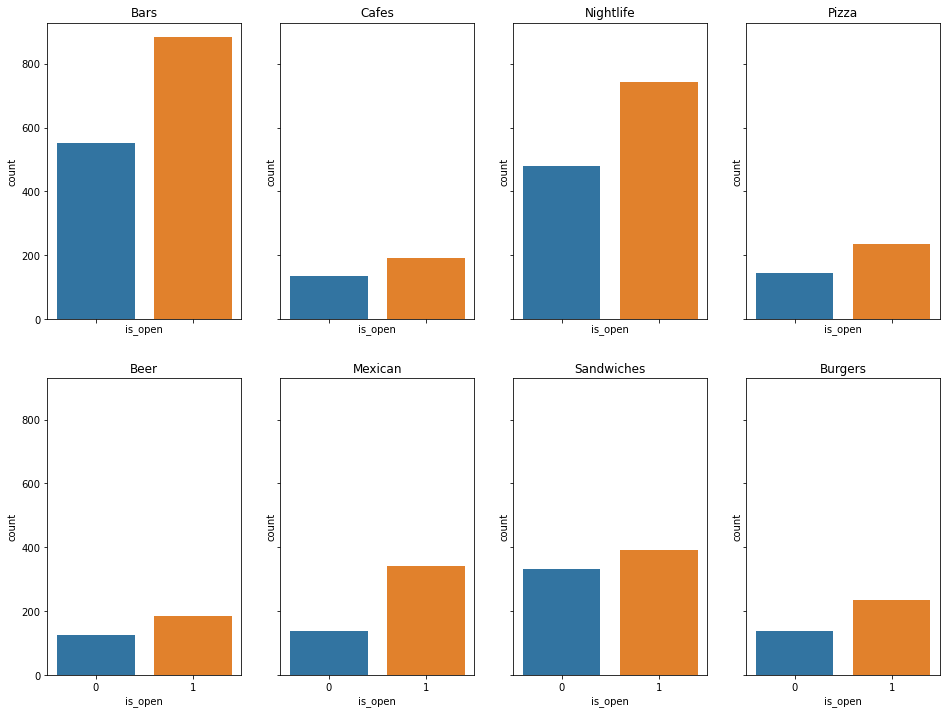

In [47]:

fig, axes = plt.subplots(2,4, sharex=True, sharey= True, figsize = (16,12))
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[i])], x = 'is_open', ax = axes[0, i]).set_title(mag[i])
for i in range(4):
    sb.countplot(data = df_city[df_city['categories'].str.contains(mag[4+i])], x = 'is_open', ax = axes[1, i]).set_title(mag[4+i])

In [48]:
for i in mag:
    array = np.zeros(len(df_city))
    indices_true = np.where(df_city['categories'].str.contains(i).values==True)
    array[indices_true]= 1
    df_city.insert(1, i, array.tolist())

In [49]:
from datetime import datetime
result['date'].values[0]

'2014-10-11 03:34:02'

In [50]:
for i in range(len(result)):
    result['date'].values[i]=datetime.fromisoformat(result['date'].values[i]).timestamp()

In [51]:
result

,business_id,stars,useful,date
0,buF9druCkbuXLX526sGELQ,4,3,1412991242.0
1,RA4V8pr014UyUbDvI-LW2A,4,1,1435948705.0
2,_sS2LBIGNT5NQb6PD1Vtjw,5,0,1369766286.0
3,0AzLzHfOJgL7ROwhdww2ew,2,1,1262914155.0
4,8zehGz9jnxPqXtOc7KaJxA,4,0,1311869101.0
...,...,...,...,...
135398,yyTtwwQ4JnQMJ2rn3W0S0g,1,0,1611630434.0
135399,RDgwjgbu5xziFIAaNn3WCQ,1,13,1556738503.0
135400,rbuj2X4SXIc3MDul4dcxIA,5,39,1592008766.0
135401,IRzjEZ2pX4iOpnBG7oZJ7g,2,2,1592855650.0


In [52]:
result = result.rename(columns={'stars': 'rates'})
#useful=result[result['useful']>=1]

In [53]:
merged=pd.merge(df_city, result)
top10=merged.sort_values(['business_id','date'],ascending=False).groupby('business_id').head(10)

In [54]:
#grouped=merged.groupby(by='business_id')
#meanuseful=grouped['rates'].mean()
top10gr=top10.groupby(by='business_id')

In [55]:
#meanuseful
top10means=top10gr['rates'].mean()
top10means=top10means.to_frame().reset_index()
top10means=top10means.rename(columns={'rates': 'mean_of_recent_10'})
df_city=pd.merge(df_city,top10means)

In [56]:
top20=merged.sort_values(['business_id','date'],ascending=False).groupby('business_id').head(20)

In [57]:
top20gr=top20.groupby(by='business_id')

In [58]:
top20means=top20gr['rates'].mean()
top20means=top20means.to_frame().reset_index()
top20means=top20means.rename(columns={'rates': 'mean_of_recent_20'})
df_city=pd.merge(df_city,top20means)

In [59]:
df_city

,index,Burgers,Sandwiches,Mexican,Beer,Pizza,Nightlife,Cafes,Bars,business_id,city,stars,review_count,is_open,categories,nhours,mean_of_recent_10,mean_of_recent_20
0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,tCbdrRPZA0oiIYSmHG3J0w,Portland,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C...",90.0,4.4,3.650000
1,36,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,jx91IMdGOmLOo8h_F9z39g,Portland,3.5,19,1,"Nightlife, Sandwiches, Seafood, Restaurants",114.0,3.4,3.450000
2,50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5PsApTz-WqhF_-8mfqGtGw,Portland,3.5,158,1,"Vegetarian, Vegan, Sandwiches, Soup, American ...",47.0,2.0,2.800000
3,93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,HMXiuCxHDXqMH1hBpaHd9g,Portland,5.0,7,0,"Food Stands, Restaurants, Sandwiches",75.0,5.0,5.000000
4,94,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,ZA3u0Nu5V6TqkcYh8U0zdg,Portland,4.5,131,0,"Restaurants, Food, Sandwiches, Breakfast & Bru...",55.5,4.8,4.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,160509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ny28j9D88xot0Eq54ojpVQ,Portland,3.5,131,0,"Italian, Restaurants",25.0,2.5,2.800000
4894,160512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7r311z2Uq_UzHqu5hiipxA,Portland,4.0,165,1,"Food Stands, Food, Street Vendors, Restaurants...",63.0,3.5,3.850000
4895,160521,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,68nXXzFyK8tzcBlv8eM3tw,Portland,3.5,108,1,"Pubs, Breweries, Food, American (Traditional),...",56.0,4.8,4.650000
4896,160537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ER_VMRSD-9FSbw4SGGNQvA,Portland,3.5,13,0,"Fashion, Men's Clothing, Restaurants, Shopping...",49.0,3.6,3.692308


In [62]:
df_final = df_city
df_final.to_csv('finaldf_closed_restaurants.csv', index=False)

In [ ]:
#dic = {}
#for ids in df_city.business_id.values:
#    df_temp=result[result['business_id']==ids]
#    df_temp.sort_values('date', ascending=False).head(100)
#    dic[ids]=df_temp['stars'].head(100).mean()

In [ ]:
#df_to_add = pd.DataFrame(columns=['business_id','medium_stars_last100'])
#df_to_add['business_id']=dic.keys()
#df_to_add['medium_stars_last100']=dic.values()
#df_to_add

In [ ]:
#df_final = pd.merge(df_to_add, df_city)
#df_final=df_final.drop('categories',axis=1)

In [ ]:
#df_final

In [ ]:
#result.rename(columns={'stars': 'rates'})

In [ ]:
#pd.merge(df_final, result, right_on = 'business_id', left_on = 'business_id')

In [ ]:
#dic2 = {}
#for ids in df_final.business_id.values:
#    df_temp=result[result['business_id']==ids]
#    df_temp.sort_values('date', ascending=False).head(10)
#    dic2[ids]=df_temp['stars'].head(10).mean()

In [ ]:
#df_to_add = pd.DataFrame(columns=['business_id','medium_stars_last10'])
#df_to_add['business_id']=dic2.keys()
#df_to_add['medium_stars']=dic2.values()
#df_to_add

In [ ]:
#df_final = pd.merge(df_final, df_to_add)

In [ ]:
#df_final

In [ ]:
#df_final.to_csv('finaldf_closed_restaurants.csv', index=False)

In [ ]:
#df_final_copy = pd.read_csv('finaldf_closed_restaurants.csv')

In [ ]:
#df_final_copy

### Logistic Regression model

In [4]:
df_final = pd.read_csv('finaldf_closed_restaurants.csv')

In [5]:
from statsmodels.stats import diagnostic
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
from sklearn.model_selection import train_test_split

# We split between train and test

train, test = train_test_split(df_final, test_size=0.2)

In [7]:
# logit is logistic regression.

mod = smf.logit(formula='is_open ~  mean_of_recent_10 + mean_of_recent_20 + Cafes + Sandwiches + \
                        Bars + Beer + Pizza	 + \
                        Mexican + Burgers +\
                        Nightlife + stars + review_count +nhours', data=train)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.628154
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                is_open   No. Observations:                 3918
Model:                          Logit   Df Residuals:                     3904
Method:                           MLE   Df Model:                           13
Date:                Sun, 21 Nov 2021   Pseudo R-squ.:                 0.07613
Time:                        20:13:50   Log-Likelihood:                -2461.1
converged:                       True   LL-Null:                       -2663.9
Covariance Type:            nonrobust   LLR p-value:                 1.479e-78
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5385      0.266     -9.528      0.000      -3.061      -2.016
mean_of_

From the summary we can see that the factor which are the most important are (with a statistical significance of 0.05):
- mean of recent 10(as expected)
- Mexicans
- review_count
- n_hours

We have a small Pseudo R-square, we don't expect a lot from the model

In [8]:
y_pred = [0 if el <0.5 else 1 for el in res.predict(test).values]

We compute the accuracy

In [9]:
from sklearn.metrics import accuracy_score as acc

print(acc(y_pred, test['is_open'].values))

0.6306122448979592


As we can see the accuracy is low

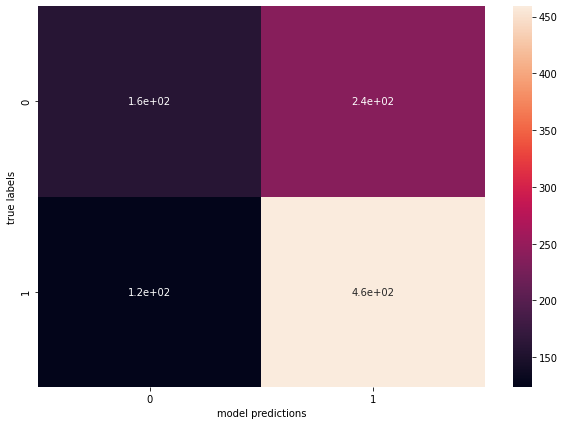

In [10]:
from sklearn import metrics

cm=metrics.confusion_matrix(test['is_open'].values, y_pred)
df_cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)
plt.xlabel('model predictions')
plt.ylabel('true labels')
plt.show()

The model has high bias. This suggests us that we should look for a more powerful and complex model to obtain higher accuracy

### We use a more powerful method (Support Vector Machine)

In [11]:
y_train = train['is_open']
x_train = train.drop(columns = ['is_open', 'business_id', 'index', 'city'])
y_test = test['is_open']
x_test = test.drop(columns = ['is_open', 'business_id', 'index', 'city'])
x_train

,Beer,Burgers,Nightlife,Pizza,Cafes,Sandwiches,Mexican,Bars,stars,review_count,categories,nhours,mean_of_recent_5,mean_of_recent_10,mean_of_recent_20
3250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,79,"Pan Asian, Hawaiian, Filipino, Food Court, Asi...",54.0,4.0,3.900000,3.550000
1266,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,5.0,12,"Cocktail Bars, Nightlife, Bars, Sandwiches, Am...",54.0,5.0,4.700000,4.750000
966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,34,"Noodles, Restaurants, Korean",60.0,3.2,3.900000,4.100000
259,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,49,"Coffee Roasteries, Coffee & Tea, Restaurants, ...",51.0,5.0,4.800000,4.850000
4590,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,6,"Food, Food Court, Food Trucks, Restaurants, Me...",49.0,4.8,4.857143,4.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5,75,"Restaurants, Pizza",85.0,3.4,2.600000,3.200000
1159,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,12,"Sandwiches, Restaurants, Fast Food",98.0,2.8,2.600000,2.833333
2074,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.5,10,"Restaurants, Food, Mexican, Food Trucks",83.0,4.8,4.700000,4.700000
1578,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.5,943,"Seafood, American (Traditional), Breakfast & B...",20.0,4.0,4.500000,4.400000


In [12]:
x_train.drop(columns = ['categories'], inplace = True)
x_train

x_test.drop(columns = ['categories'], inplace = True)
x_test

,Beer,Burgers,Nightlife,Pizza,Cafes,Sandwiches,Mexican,Bars,stars,review_count,nhours,mean_of_recent_5,mean_of_recent_10,mean_of_recent_20
1707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,279,29.0,5.0,4.6,4.55
1828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.5,137,48.0,4.2,4.5,4.70
4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,19,64.0,3.2,3.5,3.60
2105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,158,38.0,3.4,3.4,3.85
959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.5,52,129.5,4.2,4.1,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.5,278,66.0,4.2,3.8,3.90
4817,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.5,24,70.0,4.0,4.3,4.55
2766,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,35,19.0,5.0,4.9,4.75
1396,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,20,36.5,5.0,4.8,4.90


In [13]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler().fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score

# we set some of the possible values of the parameters which we will use to fit the models
param = {'kernel' : [ 'poly', 'rbf', 'sigmoid'],'C' : [0.1,1,4],'coef0' : [1,2,3,4],'gamma' : ['auto','scale']},

#we define the model
modelsvc = SVC(probability=True)

#we perform a grid search to find the best parameters in the param dictionary created before 
clf = GridSearchCV(estimator= modelsvc, param_grid=param, scoring = 'accuracy', verbose=1, n_jobs=-1)

#we fit the model with the best parameters
clf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid=({'C': [0.1, 1, 4], 'coef0': [1, 2, 3, 4],
                          'gamma': ['auto', 'scale'],
                          'kernel': ['poly', 'rbf', 'sigmoid']},),
             scoring='accuracy', verbose=1)

In [24]:
print(clf.best_estimator_) #we print the best parameters found with gridsearch
y_pred = clf.predict(x_test) #we predict now the labels

SVC(C=0.1, coef0=4, kernel='poly', probability=True)


In [25]:
#we round each value of the list because the final mark is an integer from 0 to 20

pred = [round(el) for el in y_pred] #python comprehension

In [26]:
accuracy = acc(y_test, pred)
print(accuracy)

0.6489795918367347


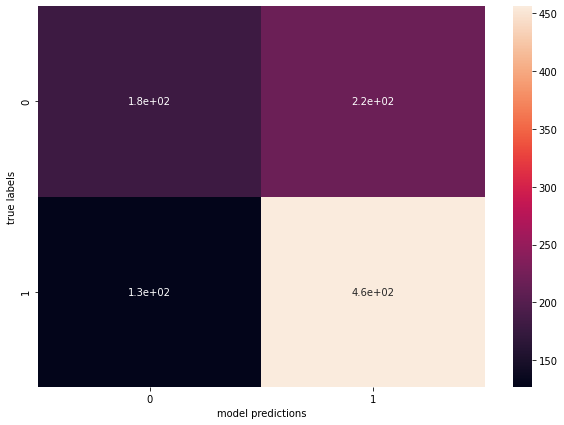

In [27]:
cm=metrics.confusion_matrix(y_test, np.array(pred))
df_cm = pd.DataFrame(cm, range(2),range(2))
plt.figure(figsize = (10,7))
sb.heatmap(df_cm, annot=True)
plt.xlabel('model predictions')
plt.ylabel('true labels')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve

# Predict the probabilities with a cross validationn
y_pred = cross_val_predict(modelsvc, x_train, y_train, cv=10, method="predict_proba")
# Compute the False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_train, y_pred[:, 1])
# Compute the area under the fpt-tpf curve
auc_score = auc(fpr, tpr)

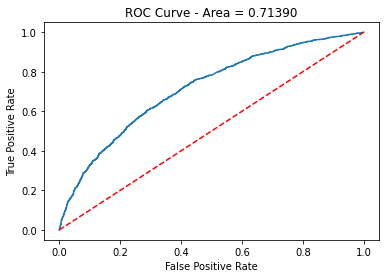

In [29]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Area = {:.5f}".format(auc_score));